In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Input # type: ignore
from tensorflow.keras import Sequential # type: ignore
from tensorflow.keras.activations import sigmoid # type: ignore
from sklearn.metrics import accuracy_score
import tensorflow as tf

df = pd.read_csv('pitch_data.csv')
X = pd.get_dummies(df[['FinalX', 'FinalY']])
Y = df['isStrike']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)


model = Sequential()
model.add(Dense(128, input_dim=len(X_train.columns), activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


model.fit(X_train, Y_train, epochs=1000, batch_size=32)

y_hat = model.predict(X_test)
print(y_hat)
y_hat = [1 if i > 0.5 else 0 for i in y_hat]  # convert to binary
accuracy_score(Y_test, y_hat)

Epoch 1/1000


/Users/xlq/Projects/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step - accuracy: 0.5104 - loss: 11.7496 
Epoch 2/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.5846 - loss: 1.4293
Epoch 3/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.6069 - loss: 1.2516
Epoch 4/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - accuracy: 0.5879 - loss: 1.6886
Epoch 5/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.6091 - loss: 0.9523
Epoch 6/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.6092 - loss: 0.9370
Epoch 7/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.5877 - loss: 0.9452
Epoch 8/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.6377 - loss: 0.7326
Epoch 9/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.6020 - loss: 0.8229
Epoch 10/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.5416 - loss: 1.5482
Epoch 11/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.5609 - loss: 1.5683
Epoch 12/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 

0.65

In [2]:
import numpy as np
print(model.predict(np.array([[400, 800]])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.31702936]]


<Axes: xlabel='FinalX', ylabel='FinalY'>

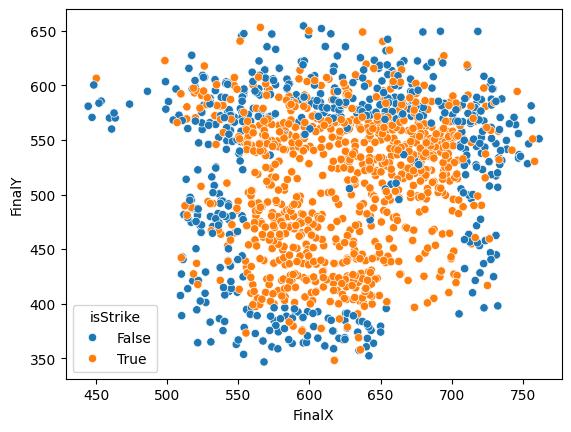

In [3]:
import seaborn as sns
sns.scatterplot(x='FinalX', y='FinalY', data=df, hue='isStrike')

<Axes: xlabel='finalx', ylabel='finaly'>

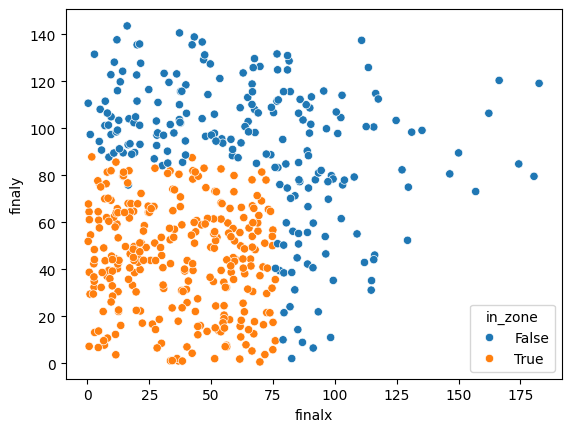

In [4]:
#Center of strikezone is 630, 485
df2 = pd.read_csv('new_pitch_data.csv')
df2['finalx'] = df2['finalx'].apply(lambda x: abs(x - 630))
df2['finaly'] = df2['finaly'].apply(lambda x: abs(x - 485))
sns.scatterplot(x='finalx', y='finaly', data=df2, hue='in_zone')

In [5]:
x2 = pd.get_dummies(df2[['finalx', 'finaly']])
y2 = df2['in_zone']


trainX, testX, trainY, testY = train_test_split(x2, y2, test_size=0.2)

model2 = Sequential()
model2.add(Dense(24, input_dim=len(X_train.columns), activation='relu'))
model2.add(tf.keras.layers.Dropout(0.01))
model2.add(Dense(units=32, activation='relu'))
model2.add(tf.keras.layers.Dropout(0.01))
model2.add(Dense(units=1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])


model2.fit(testX, testY, epochs=5000, batch_size=32)

preds = model2.predict(testX)
preds = [1 if i > 0.5 else 0 for i in preds]  # convert to binary
accuracy_score(testY, preds)

Epoch 1/5000


/Users/xlq/Projects/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5209 - loss: 3.1532  
Epoch 2/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - accuracy: 0.5470 - loss: 1.6013
Epoch 3/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.4801 - loss: 1.4212
Epoch 4/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.5312 - loss: 1.4783
Epoch 5/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accuracy: 0.6443 - loss: 0.9163
Epoch 6/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.5222 - loss: 1.4910
Epoch 7/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.6101 - loss: 1.0711
Epoch 8/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.4993 - loss: 1.3077
Epoch 9/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.5789 - loss: 1.0657
Epoch 10/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.5232 - loss: 1.1397
Epoch 11/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - accuracy: 0.6003 - loss: 0.9679
Epoch 12/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 

1.0

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step


<Axes: xlabel='finalx', ylabel='finaly'>

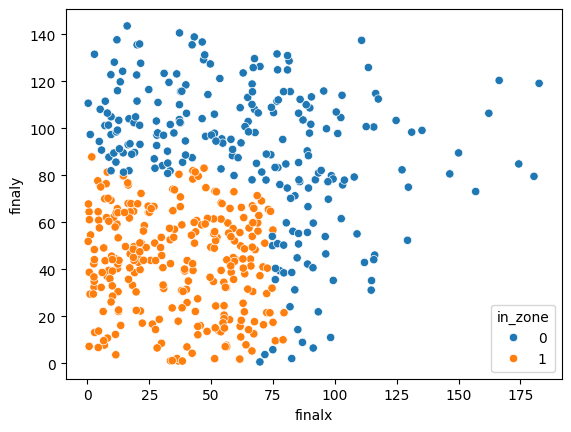

In [6]:
predictions = model2.predict(x2)
predictions = [1 if i > 0.5 else 0 for i in predictions]  # convert to binary
x2['in_zone'] = predictions
sns.scatterplot(x='finalx', y='finaly', data=x2, hue='in_zone')